
# IE 582 Statistical Learning for Data Mining - Homework 1

# Mine Gazioğlu

In [501]:
# Importing necessary libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
import matplotlib.pylab as plb # visualization
import seaborn as sns # visualization
import warnings # ignore deprecation warnings etc.
warnings.filterwarnings("ignore")
import time # dealing with time data
from datetime import datetime, timedelta # dealing with time data

In [502]:
# Load data with pandas

goals = pd.read_csv("582\goals\goals.csv")
stats = pd.read_csv("582\stats\stats.csv")
matches = pd.read_csv("582\matches\matches.csv")
booking = pd.read_csv("582\\bookings\\bookings.csv")
bets = pd.read_csv("582\\bets\\bets.csv")

# Task 1 

# 1.Plot the following histogram diagrams
**a. Home Score(goals)   -- 
  b. Away Score(goals)   --
  c. Home Score(goals)– Away Score(goals)**

In [503]:
# For this task we will work with English Premier League so let's filter out the other league's data
matches = matches[matches["league_id"] == 148]

In [504]:
# select columns needed from matches dataframe
matches_df = matches[["match_id","match_hometeam_score","match_awayteam_score"]]
# rename the columns
matches_df = matches_df.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
#drop na values(they represent games that haven't been played yet)
matches_df.dropna(inplace = True)

In [505]:
# set the type of home & away scores to integers
matches_df["home_score"] = matches_df["home_score"].astype(int)
matches_df["away_score"] = matches_df["away_score"].astype(int)

In [506]:
# taking a look at matches_df dataframe
matches_df.head()

,match_id,home_score,away_score
4,140194,2,2
9,140198,0,1
10,140195,0,0
11,140200,0,2
12,140199,0,1


**a)Home Score(goals)**

Text(0.5, 1.0, 'Home Score(goals)')

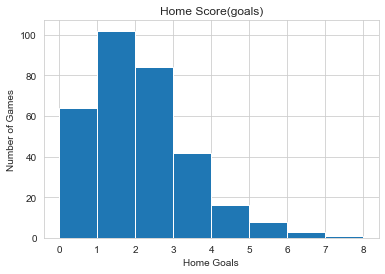

In [507]:
# Plot a histogram of home_scores
plt.hist(matches_df.home_score, bins = 8)
plt.xlabel("Home Goals")
plt.ylabel("Number of Games")
plt.title("Home Score(goals)")

**b)Away Score(goals)**

Text(0.5, 1.0, 'Away Score(goals)')

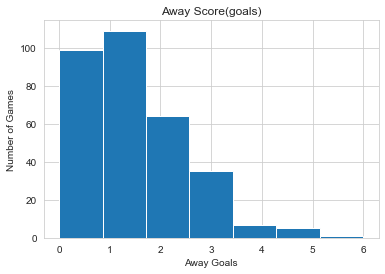

In [508]:
# Plot a histogram of away_scores
plt.hist(matches_df.away_score, bins = 7)
plt.xlabel("Away Goals")
plt.ylabel("Number of Games")
plt.title("Away Score(goals)")

**c)Home Score(goals)– Away Score(goals)**

Text(0.5, 1.0, 'Home Score(goals)– Away Score(goals)')

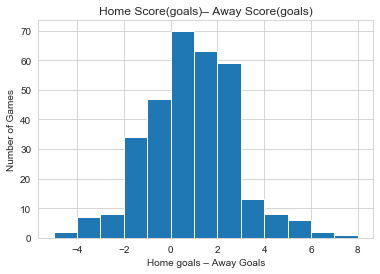

In [509]:
plt.hist((matches_df.home_score - matches_df.away_score), bins = 13)
plt.xlabel("Home goals – Away Goals")
plt.ylabel("Number of Games")
plt.title("Home Score(goals)– Away Score(goals)")

# 2. Poisson Distribution vs. Actual Outcomes

 **Check the mean and variance for Home and Away Scores**

In [510]:
## Check the mean and the variance for Home and Away Scores. For Poisson Distribution mean and variance are equal
# Note : mean are variance could also be equal for other distributions but not necessarily

# Home Goals

# sample mean
home_sample_mean = matches_df["home_score"].mean()
print("\033[1m Sample Mean Home Score : {0:.2f}  \033[0m".format(home_sample_mean))

# sample variance
home_sample_variance = np.var(matches_df["home_score"])
print("\033[1m Sample Variance Home Score : {0:.2f} \033[0m".format(home_sample_variance))

print("---")
# Away Goals

# sample mean
away_sample_mean = matches_df["away_score"].mean()
print("\033[1m Sample Mean Away Score: {0:.2f} \033[0m".format(away_sample_mean))

# sample variance
away_sample_variance = np.var(matches_df["away_score"])
print("\033[1m Sample Variance Away Score: {0:.2f} \033[0m".format(away_sample_variance))

 Sample Mean Home Score : 1.64  
 Sample Variance Home Score : 1.81 
---
 Sample Mean Away Score: 1.25 
 Sample Variance Away Score: 1.41 


Sample mean and for variance for both home and away scores are pretty close. Let's investigate further

In [511]:
# Declare 2 variables to keep home score and away score columns

home_score = matches_df["home_score"]
away_score = matches_df["away_score"]

**Calculate the expected number of games corresponding to each quantile and compare with actual scores with Poisson Distribution**

In [512]:
# calculate sample mean (we will consider lambda equal to sample mean) for home & away scores

lamb_home = home_score.mean()
lamb_away = away_score.mean()

# Calculate the expected number of games corresponding to each quantile (number of goals) with Poisson distribution
# Also, set a seed because otherwise we will get different sets of random expected values each time we run this

expected_home = np.random.RandomState(seed = 42).poisson(lamb_home, len(home_score))
expected_away = np.random.RandomState(seed = 42).poisson(lamb_away, len(away_score))

In [513]:
# Find unique scores in expected_home and expected_away, we can use these to set bins number for our histogram

print(set(expected_home))
print(set(expected_away))

{0, 1, 2, 3, 4, 5, 6, 8}
{0, 1, 2, 3, 4, 5, 6}


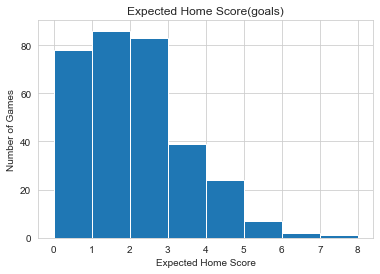

In [514]:
# Plot histogram for expected scores

# Home

plt.hist(expected_home, bins = 8)
plt.xlabel("Expected Home Score")
plt.ylabel("Number of Games")
plt.title("Expected Home Score(goals)")
plt.show()

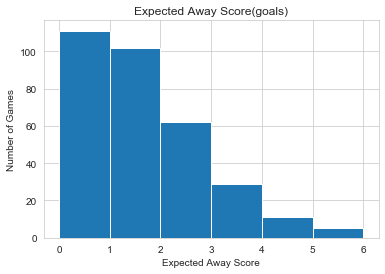

In [515]:
# Away

plt.hist(expected_away, bins = 6)
plt.xlabel("Expected Away Score")
plt.ylabel("Number of Games")
plt.title("Expected Away Score(goals)")
plt.show()

**Compare the actual outcomes with the theoretical distribution on a plot**

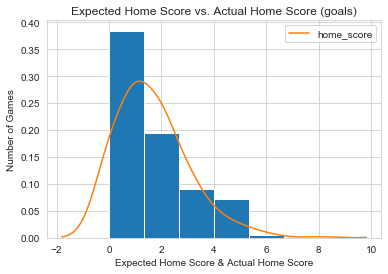

In [516]:
# Home Scores vs. Expected Home Scores

# density plot with the hist() function
# use histogram to plot expected values 
# use kdeplot to plot a density plot to plot home_score
# bw(bandwidth) controls how smooth you want the density plot to be. The larger the bw, the smoother it will be

plt.figure()
plt.hist([expected_home], histtype='barstacked', normed=True, bins = 6)
sns.set_style('whitegrid')
sns.kdeplot(home_score, bw=0.6)

plt.xlabel("Expected Home Score & Actual Home Score")
plt.ylabel("Number of Games")
plt.title("Expected Home Score vs. Actual Home Score (goals)")
plt.show()

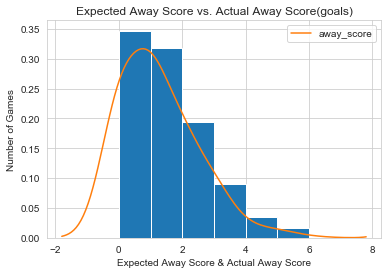

In [517]:
# Away Scores vs. Expected Away Scores

# density plot with the hist() function
# use histogram to plot expected values 
# use kdeplot to plot a density plot for away_score

plt.figure()
plt.hist([expected_away], histtype='barstacked',normed = True, bins = 6)
sns.set_style('whitegrid')
sns.kdeplot(away_score, bw=0.6)

plt.xlabel("Expected Away Score & Actual Away Score")
plt.ylabel("Number of Games")
plt.title("Expected Away Score vs. Actual Away Score(goals)")
plt.show()

**Discussion :**

Our assumption that home and away goals fit Poisson Distribution can be accepted since both these score types<br>
**1.** have very close mean and variances and<br> 
**2.** from the comparison histograms it can be observed that expected and actual distributions show the same pattern.

# Task 2

**1.Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd**

In [518]:
# we will work with bets and matches dataframes for this task
bets.head()

,match_id,odd_bookmakers,odd_epoch,variable,value
0,150842,Interwetten.es,1542450501,odd_1,1.45
1,150842,Titanbet,1542450501,odd_1,1.36
2,150842,ComeOn,1542450501,odd_1,1.39
3,150842,Jetbull,1542450501,odd_1,1.38
4,150842,NordicBet,1542450501,odd_1,1.40


In [519]:
# converting odd_epoch column into datetime format for bets dataframe
start = datetime(1970, 1, 1)  # Unix epoch start time
bets['datetime'] = bets.odd_epoch.apply(lambda x: start + timedelta(seconds=x))

In [520]:
# select top 4 bookmakers with highest number of bets
# Group bets by odd_bookmakers then take count over groups
grouped_bets = bets.groupby("odd_bookmakers").count()["match_id"].reset_index()
# Sort the grouped bets dataframe in descending order and take first 4 rows
grouped_bets_sorted = grouped_bets.sort_values(by = "match_id",ascending = False)
display(grouped_bets_sorted[:4])
# List of selected bookmakers
selected_bookmakers = ["1xBet","18bet","bet365","Chance.cz"]

,odd_bookmakers,match_id
3,1xBet,67512
2,18bet,48242
54,bet365,42039
21,Chance.cz,38888


Analyze bets of single type(win,draw,loss)(odd_1,odd_x,odd_2) for each bookmaker

**1xBet**

In [521]:
# 1xBet
# Filter odd_bookmaker:1xBet & variable: odd_1,odd_2 and odd_x for bets dataframe

single_bets = ["odd_1","odd_2","odd_x"]
xbet = bets[(bets["variable"].isin(single_bets)) & (bets["odd_bookmakers"] == "1xBet")]

#drop duplicates for bet changes and take the last bet with the most recent time since we sometimes have multiple rows

xbet_modified = xbet.sort_values('datetime').drop_duplicates(['match_id', 'odd_bookmakers', 'variable'],keep='last')

# Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd

xbet_modified["probabilities"] = xbet_modified.apply(lambda row: (1/row["value"]),axis = 1)

In [522]:
# Let's take a look at newly added column of probabilities for bookmaker 1xBet
xbet_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities
5887,152166,1xBet,1542307253,odd_2,4.26,2018-11-15 18:40:53,0.234742
5835,152166,1xBet,1542307253,odd_x,4.30,2018-11-15 18:40:53,0.232558
5783,152166,1xBet,1542307253,odd_1,1.65,2018-11-15 18:40:53,0.606061
53,150842,1xBet,1542450501,odd_1,1.38,2018-11-17 10:28:21,0.724638
912,150842,1xBet,1542450501,odd_x,4.92,2018-11-17 10:28:21,0.203252


**18bet**

In [523]:
# 18bet
# Filter odd_bookmaker:18bet & variable: odd_1,odd_2 and odd_x

single_bets = ["odd_1","odd_2","odd_x"]
eightbet = bets[(bets["variable"].isin(single_bets)) & (bets["odd_bookmakers"] == "18bet")]

#drop duplicates for bet changes and take the last bet with the most recent time

eightbet_modified = eightbet.sort_values('datetime').drop_duplicates(['match_id', 'odd_bookmakers', 'variable'],keep='last')

# Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd

eightbet_modified["probabilities"] = eightbet_modified.apply(lambda row: (1/row["value"]),axis = 1)

In [524]:
eightbet_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities
5773,152166,18bet,1542307253,odd_1,1.72,2018-11-15 18:40:53,0.581395
5825,152166,18bet,1542307253,odd_x,3.90,2018-11-15 18:40:53,0.256410
5877,152166,18bet,1542307253,odd_2,4.00,2018-11-15 18:40:53,0.250000
1759,150842,18bet,1542450501,odd_2,8.50,2018-11-17 10:28:21,0.117647
900,150842,18bet,1542450501,odd_x,5.00,2018-11-17 10:28:21,0.200000


**bet365**

In [525]:
# bet365
# Filter odd_bookmaker:bet365 & variable: odd_1,odd_2 and odd_x

single_bets = ["odd_1","odd_2","odd_x"]
bet365 = bets[(bets["variable"].isin(single_bets)) & (bets["odd_bookmakers"] == "bet365")]

#drop duplicates for bet changes and take the last bet with the most recent time

bet365_modified = bet365.sort_values('datetime').drop_duplicates(['match_id', 'odd_bookmakers', 'variable'],keep='last')

# Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd
# Here we had an interesting case one value was equal to 0 for odd_1 and we got a ZeroDivisionError.
# That value is replaced with 0

bet365_modified["probabilities"] = 1/(bet365_modified["value"])
bet365_modified.loc[~np.isfinite(bet365_modified['probabilities']), 'probabilities'] = 0

In [526]:
bet365_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities
5854,152166,bet365,1542307253,odd_2,4.33,2018-11-15 18:40:53,0.230947
5802,152166,bet365,1542307253,odd_x,3.75,2018-11-15 18:40:53,0.266667
5750,152166,bet365,1542307253,odd_1,1.61,2018-11-15 18:40:53,0.621118
15,150842,bet365,1542450501,odd_1,1.40,2018-11-17 10:28:21,0.714286
874,150842,bet365,1542450501,odd_x,5.00,2018-11-17 10:28:21,0.200000


**Chance.cz**

In [527]:
# Chance.cz
# Filter odd_bookmaker:1xBet & variable: odd_1,odd_2 and odd_x

single_bets = ["odd_1","odd_2","odd_x"]
chance = bets[(bets["variable"].isin(single_bets)) & (bets["odd_bookmakers"] == "Chance.cz")]

#drop duplicates for bet changes and take the last bet with the most recent time

chance_modified = chance.sort_values('datetime').drop_duplicates(['match_id', 'odd_bookmakers', 'variable'],keep='last')

# Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd

chance_modified["probabilities"] = chance_modified.apply(lambda row: (1/row["value"]),axis = 1)

In [528]:
chance_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities
5780,152166,Chance.cz,1542307253,odd_1,1.71,2018-11-15 18:40:53,0.584795
5832,152166,Chance.cz,1542307253,odd_x,3.80,2018-11-15 18:40:53,0.263158
5884,152166,Chance.cz,1542307253,odd_2,4.36,2018-11-15 18:40:53,0.229358
50,150842,Chance.cz,1542450501,odd_1,1.39,2018-11-17 10:28:21,0.719424
909,150842,Chance.cz,1542450501,odd_x,5.13,2018-11-17 10:28:21,0.194932


**2.Calculate these probabilities again using normalization formula for each bookmaker**

**1xBet**

In [529]:
# 1xBet
# create a series object by groupby on match id column and summation of 1/row for that id then take the inverse.
a = 1/(xbet_modified.groupby("match_id").apply(lambda row: np.sum(1/row.value)))
# convert series object into a dictionary
b = a.to_dict()
# map the dictionary keys being match_id's then multiply with probabilities column to get normalized probabiilities
xbet_modified["normalized_probs"] = (xbet_modified["match_id"].map(b)) *  (xbet_modified["probabilities"])

Let's verify the results of our newly created column normalized probs

Pick a match_id as our choice of example : **152166**

In [530]:
display(xbet_modified[xbet_modified["match_id"] == 152166])

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities,normalized_probs
5887,152166,1xBet,1542307253,odd_2,4.26,2018-11-15 18:40:53,0.234742,0.218698
5835,152166,1xBet,1542307253,odd_x,4.30,2018-11-15 18:40:53,0.232558,0.216664
5783,152166,1xBet,1542307253,odd_1,1.65,2018-11-15 18:40:53,0.606061,0.564638


For the normalized probababilities our calculations should be: (1/value) * (1/(1/value_1 + 1/value_x +  1/value_2))

So, in this case : (1/4.26) * (1/(1/4.26 + 1/4.30 +  1/1.65)) = 0.218698 as can be seen from the dataframe above

**18bet**

In [531]:
# 18bet
# create a series object by groupby on match id column and summation of 1/row for that id than take the inverse.
c = 1/(eightbet_modified.groupby("match_id").apply(lambda row: np.sum(1/row.value)))
# convert series object into a dictionary
d = c.to_dict()
# map the dictionary keys being match_id's then multiply with probabilities column to get normalized probabiilities
eightbet_modified["normalized_probs"] = (eightbet_modified["match_id"].map(d)) *  (eightbet_modified["probabilities"])

In [532]:
eightbet_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities,normalized_probs
5773,152166,18bet,1542307253,odd_1,1.72,2018-11-15 18:40:53,0.581395,0.534466
5825,152166,18bet,1542307253,odd_x,3.90,2018-11-15 18:40:53,0.256410,0.235713
5877,152166,18bet,1542307253,odd_2,4.00,2018-11-15 18:40:53,0.250000,0.229820
1759,150842,18bet,1542450501,odd_2,8.50,2018-11-17 10:28:21,0.117647,0.114007
900,150842,18bet,1542450501,odd_x,5.00,2018-11-17 10:28:21,0.200000,0.193811


**bet365**

In [533]:
# bet365
# create a series object by groupby on match id column and summation of 1/row for that id than take the inverse.
e = 1/(bet365_modified.groupby("match_id").apply(lambda row: np.sum(1/row.value)))
# convert series object into a dictionary
f = e.to_dict()
# map the dictionary keys being match_id's then multiply with probabilities column to get normalized probabiilities
bet365_modified["normalized_probs"] = (bet365_modified["match_id"].map(f)) *  (bet365_modified["probabilities"])

In [534]:
bet365_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities,normalized_probs
5854,152166,bet365,1542307253,odd_2,4.33,2018-11-15 18:40:53,0.230947,0.206436
5802,152166,bet365,1542307253,odd_x,3.75,2018-11-15 18:40:53,0.266667,0.238365
5750,152166,bet365,1542307253,odd_1,1.61,2018-11-15 18:40:53,0.621118,0.555198
15,150842,bet365,1542450501,odd_1,1.40,2018-11-17 10:28:21,0.714286,0.696594
874,150842,bet365,1542450501,odd_x,5.00,2018-11-17 10:28:21,0.200000,0.195046


**Chance.cz**

In [535]:
# Chance.cz
# create a series object by groupby on match id column and summation of 1/row for that id than take the inverse.
g = 1/(chance_modified.groupby("match_id").apply(lambda row: np.sum(1/row.value)))
# convert series object into a dictionary
h = g.to_dict()
# map the dictionary keys being match_id's then multiply with probabilities column to get normalized probabiilities
chance_modified["normalized_probs"] = (chance_modified["match_id"].map(h)) *  (chance_modified["probabilities"])

In [536]:
chance_modified.head()

,match_id,odd_bookmakers,odd_epoch,variable,value,datetime,probabilities,normalized_probs
5780,152166,Chance.cz,1542307253,odd_1,1.71,2018-11-15 18:40:53,0.584795,0.542829
5832,152166,Chance.cz,1542307253,odd_x,3.80,2018-11-15 18:40:53,0.263158,0.244273
5884,152166,Chance.cz,1542307253,odd_2,4.36,2018-11-15 18:40:53,0.229358,0.212898
50,150842,Chance.cz,1542450501,odd_1,1.39,2018-11-17 10:28:21,0.719424,0.699570
909,150842,Chance.cz,1542450501,odd_x,5.13,2018-11-17 10:28:21,0.194932,0.189552


**Construct a plot of P(home win) – P(away win) on x-axis and P (tie) on y-axis with first
probability calculation; then plot the actual probabilities calculated using the results**

**For this part we will follow these steps:** <br>  1. For each bookmaker seperate home win, away win and draw probabilities into dataframes<br> 2.Then merge them with matches dataframe so that we can have access to draw scores for calculation<br>3.Calculate P(Home)-P(Away) probabilities and add this as a column<br>4.Divide P(Home-Away) column into bins<br>5.Perform calculation of # of draws in each bin over total games in that bin<br>6.Plot the graph

1. For each bookmaker seperate home win, away win and draw probabilities into dataframes

**1xBet**

In [537]:
# 1xBet
# Dataframe for home win
xbet_homewin = xbet_modified[xbet_modified["variable"] == "odd_1"]
xbet_homewin = xbet_homewin[["match_id","probabilities"]]
xbet_homewin = xbet_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
xbet_awaywin = xbet_modified[xbet_modified["variable"] == "odd_2"]
xbet_awaywin = xbet_awaywin[["match_id","probabilities"]]
xbet_awaywin = xbet_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
xbet_draw = xbet_modified[xbet_modified["variable"] == "odd_x"]
xbet_draw = xbet_draw[["match_id","probabilities"]]
xbet_draw = xbet_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [xbet_homewin,xbet_awaywin,xbet_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

3. Calculate P(Home)-P(Away) probabilities and add this as a column

In [538]:
# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


**discretize P(home win) – P(away win) values into bins (i.e. (-1,-0.8], (-
0.8, -0.6], …, (0.8,1]) and calculate the number of games ended as “Draw” in the corresponding
bin**

In [539]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

In [540]:
#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

5.Perform calculation of # of draws in each bin over total games in that bin

In [541]:
# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

In [542]:
# Finally check how our dataframe looks
df_merged.head()

,match_id,homewin_probs,awaywin_probs,draw_probs,home_score,away_score,phome-paway,difference,draw,binned,binned_draw
1,150842,0.724638,0.113636,0.203252,0.0,0.0,0.611001,0.0,1,9,0.184211
2,150843,0.628931,0.176991,0.234742,1.0,1.0,0.451940,0.0,1,8,0.205882
3,150844,0.746269,0.113636,0.185185,3.0,1.0,0.632632,2.0,0,9,0.184211
26,154513,0.323625,0.392157,0.304878,1.0,1.0,-0.068532,0.0,1,5,0.256410
27,154516,0.704225,0.114943,0.200000,0.0,0.0,0.589283,0.0,1,8,0.205882


Text(0, 0.5, 'P(tie)')

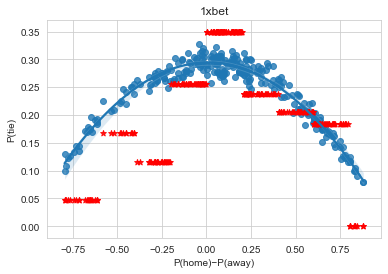

In [543]:
x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('1xbet')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')

_Repeating the same steps for the other 3 bookmakers as 1xBet_

**18bet**

In [544]:
# 18bet
# Dataframe for home win
eightbet_homewin = eightbet_modified[eightbet_modified["variable"] == "odd_1"]
eightbet_homewin = eightbet_homewin[["match_id","probabilities"]]
eightbet_homewin = eightbet_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
eightbet_awaywin = eightbet_modified[eightbet_modified["variable"] == "odd_2"]
eightbet_awaywin = eightbet_awaywin[["match_id","probabilities"]]
eightbet_awaywin = eightbet_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
eightbet_draw = eightbet_modified[eightbet_modified["variable"] == "odd_x"]
eightbet_draw = eightbet_draw[["match_id","probabilities"]]
eightbet_draw = eightbet_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [eightbet_homewin,eightbet_awaywin,eightbet_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

In [545]:
# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


**discretize P(home win) – P(away win) values into bins (i.e. (-1,-0.8], (-
0.8, -0.6], …, (0.8,1]) and calculate the number of games ended as “Draw” in the corresponding
bin**

In [546]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

In [547]:
#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

In [548]:
# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

In [549]:
df_merged.head()

,match_id,homewin_probs,awaywin_probs,draw_probs,home_score,away_score,phome-paway,difference,draw,binned,binned_draw
1,150842,0.714286,0.117647,0.200000,0.0,0.0,0.596639,0.0,1,8,0.176471
2,150843,0.613497,0.181818,0.238095,1.0,1.0,0.431679,0.0,1,8,0.176471
3,150844,0.740741,0.111111,0.190476,3.0,1.0,0.629630,2.0,0,9,0.189189
26,154513,0.333333,0.392157,0.312500,1.0,1.0,-0.058824,0.0,1,5,0.268293
27,154516,0.714286,0.121212,0.204082,0.0,0.0,0.593074,0.0,1,8,0.176471


Text(0, 0.5, 'P(tie)')

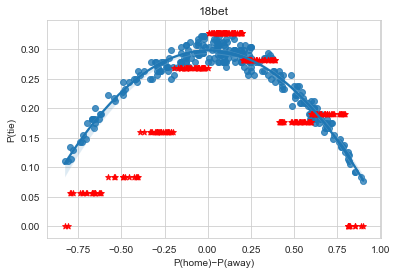

In [550]:
x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('18bet')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')

**bet365**

In [551]:
# bet365
# Dataframe for home win
bet365_homewin = bet365_modified[bet365_modified["variable"] == "odd_1"]
bet365_homewin = bet365_homewin[["match_id","probabilities"]]
bet365_homewin = bet365_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
bet365_awaywin = bet365_modified[bet365_modified["variable"] == "odd_2"]
bet365_awaywin = bet365_awaywin[["match_id","probabilities"]]
bet365_awaywin = bet365_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
bet365_draw = bet365_modified[bet365_modified["variable"] == "odd_x"]
bet365_draw = bet365_draw[["match_id","probabilities"]]
bet365_draw = bet365_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [bet365_homewin,bet365_awaywin,bet365_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

In [552]:
# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


**discretize P(home win) – P(away win) values into bins (i.e. (-1,-0.8], (-
0.8, -0.6], …, (0.8,1]) and calculate the number of games ended as “Draw” in the corresponding
bin**

In [553]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

In [554]:
#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

In [555]:
# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

In [556]:
df_merged.head()

,match_id,homewin_probs,awaywin_probs,draw_probs,home_score,away_score,phome-paway,difference,draw,binned,binned_draw
1,150842,0.714286,0.111111,0.200000,0.0,0.0,0.603175,0.0,1,9,0.230769
2,150843,0.621118,0.173913,0.230947,1.0,1.0,0.447205,0.0,1,8,0.137931
3,150844,0.735294,0.111111,0.181818,3.0,1.0,0.624183,2.0,0,9,0.230769
26,154513,0.333333,0.421941,0.312500,1.0,1.0,-0.088608,0.0,1,5,0.285714
27,154516,0.735294,0.133333,0.200000,0.0,0.0,0.601961,0.0,1,9,0.230769


Text(0, 0.5, 'P(tie)')

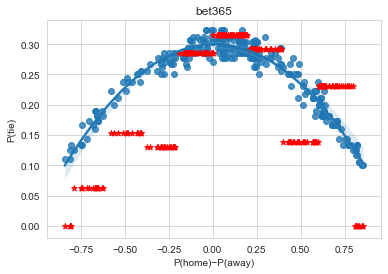

In [557]:
x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('bet365')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')

**Chance.cz**

In [558]:
# Chance.cz
# Dataframe for home win
chance_homewin = chance_modified[chance_modified["variable"] == "odd_1"]
chance_homewin = chance_homewin[["match_id","probabilities"]]
chance_homewin = chance_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
chance_awaywin = chance_modified[chance_modified["variable"] == "odd_2"]
chance_awaywin = chance_awaywin[["match_id","probabilities"]]
chance_awaywin = chance_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
chance_draw = chance_modified[chance_modified["variable"] == "odd_x"]
chance_draw = chance_draw[["match_id","probabilities"]]
chance_draw = chance_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [chance_homewin,chance_awaywin,chance_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

In [559]:
# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


**discretize P(home win) – P(away win) values into bins (i.e. (-1,-0.8], (-
0.8, -0.6], …, (0.8,1]) and calculate the number of games ended as “Draw” in the corresponding
bin**

In [560]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

In [561]:
#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

In [562]:
# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

In [563]:
df_merged.head()

,match_id,homewin_probs,awaywin_probs,draw_probs,home_score,away_score,phome-paway,difference,draw,binned,binned_draw
1,150842,0.719424,0.114025,0.194932,0.0,0.0,0.605399,0.0,1,9,0.222222
2,150843,0.609756,0.174825,0.243309,1.0,1.0,0.434931,0.0,1,8,0.147059
3,150844,0.740741,0.112108,0.178253,3.0,1.0,0.628633,2.0,0,9,0.222222
26,154513,0.331126,0.401606,0.310559,1.0,1.0,-0.070481,0.0,1,5,0.261905
27,154516,0.704225,0.125313,0.209205,0.0,0.0,0.578912,0.0,1,8,0.147059


Text(0, 0.5, 'P(tie)')

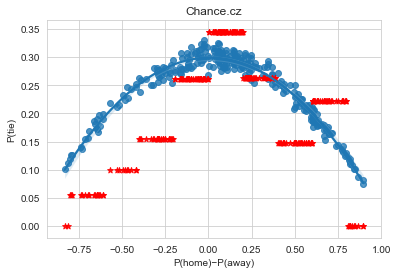

In [564]:
x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('Chance.cz')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')

**Discussion:**

Our assumption was that if the draw probabilities calculated from the sample are larger than the probability proposed by the bookmaker it should be profitable to bet on draw games for that bin. For all 4 bookmakers the peak of the curves (0.00-0.25 interval on x-axis) seems a good interval to bet on since calculated draw probabilities are above the ones set by the bookmakers. Dependant on the bookmaker there are inteval in which the calculated draw probabilities are above the existing ones. However as expected they are  little in number compared to the existing ones. Most calculated probabilities ar below the proposed results. From these findings we can say there is a bias in odds representing the probabilities.

# Task 3

**Remove matches that create noise in the outcomes**

1.The home team scores the winning goal after 90th minute

In [565]:
# Split score column into home score and away score for goals dataframe
goals[['home_score','away_score']]  = goals['score'].str.split('-', n = 2 ,expand = True )

In [566]:
# Convert type of scores to integer
goals["home_score"] = goals["home_score"].astype(int)
goals["away_score"] = goals["away_score"].astype(int)

In [567]:
# Find rows that have greater time than 90(you can also use pyparser)
# We need to convert strings that have + operator inbetween so that we can convert them to integer


greater_than_90_modified_dict = {'90+2':"92", '90+4':"94", '90+1':"91", '90+3':"93", 
                            '90+7':"97", '90+6':"96", '90+5':"95", '90+9':"99", '90+11':"101",
                                 '90+8':"98","45+1":"46","45+2":"47","45+3":"48","45+4":"49",'45+5':"50",'45+6':"51",
                                "45+14":"59","89+7":"96","45+8":"53",'90+12':"102",'45+13':"58",'90+10':"100"}


In [568]:
# Replace keys in greater_than_90_modified_dict with values
goals["time"] = goals["time"].replace(greater_than_90_modified_dict)

In [569]:
# Convert home score and away score goals to integer

goals["home_score"] = goals["home_score"].astype(int)
goals["away_score"] = goals["away_score"].astype(int)
goals["time"] = goals["time"].astype(int)

In [570]:
# Drop columns we don't need
goals.drop(["home_scorer","score","away_scorer"],axis = 1,inplace = True)

In [571]:
# Find games that end in a home win and also lasts more than 90 minutes take the last value in a group
endScores = goals.loc[(goals['time'] > 90) & (goals['home_score'] > goals['away_score'])].groupby('match_id').nth(-1)
# Find games that end in a away win or a draw and also lasts less than or equal to 90 minutes take the last value in a group
beforeScores = goals.loc[(goals['time'] <= 90) & (goals['home_score'] <= goals['away_score'])].groupby('match_id').nth(-1)
#Join endScores and beforeScores and find their intersection these are the match ids we want
compareGames = beforeScores.join(endScores, rsuffix='_end').dropna().reset_index()

In [572]:
# Take match_id's so that we can drop them later on
MatchestoDropHomewin = compareGames["match_id"].tolist()

2.match ends in a draw (tie) because the losing team scores the goal after 90th minute

In [573]:
# Find games that end in a away win and also lasts more than 90 minutes take the last value in a group
endScores = goals.loc[(goals['time'] > 90) & (goals['away_score'] == goals['home_score'])].groupby('match_id').nth(-1)
# Find games that end in a home win or a draw and also lasts less than or equal to 90 minutes take the last value in a group
beforeScores = goals.loc[(goals['time'] <= 90) & ((goals['away_score'] < goals['home_score']) | (goals['away_score'] > goals['home_score']))].groupby('match_id').nth(-1)
#Join endScores and beforeScores and find their intersection these are the match ids we want
compareGames = beforeScores.join(endScores, rsuffix='_end').dropna().reset_index()

In [574]:
# Take match_id's so that we can drop them later on
MatchestoDropdraw= compareGames["match_id"].tolist()

3.match ends in away win because the team scores the goal after 90th minute

In [575]:
# Find games that end in a away win and also lasts more than 90 minutes take the last value in a group
endScores = goals.loc[(goals['time'] > 90) & (goals['away_score'] > goals['home_score'])].groupby('match_id').nth(-1)
# Find games that end in a home win or a draw and also lasts less than or equal to 90 minutes take the last value in a group
beforeScores = goals.loc[(goals['time'] <= 90) & (goals['away_score'] <= goals['home_score'])].groupby('match_id').nth(-1)
#Join endScores and beforeScores and find their intersection these are the match ids we want
compareGames = beforeScores.join(endScores, rsuffix='_end').dropna().reset_index()

In [576]:
# Take match_id's so that we can drop them later on
MatchestoDropAwaywin = compareGames["match_id"].tolist()

In [577]:
# Combine all 3 lists into 1 complete list
MatchestoDropMerged = set(MatchestoDropHomewin + MatchestoDropdraw + MatchestoDropAwaywin)
print(MatchestoDropMerged)

{194567, 198153, 243211, 162318, 281114, 162845, 147998, 251935, 171046, 143416, 159830, 178783, 216677, 161896, 210560, 193199, 195250, 193203, 278715, 169661, 199870, 224448, 278723, 173765, 224453, 278727, 165578, 278731, 278732, 224466, 167637, 171739, 224477, 224497, 271102, 186624, 155392, 271106, 271104, 186630, 155399, 186634, 271115, 261900, 252686, 195343, 195344, 213265, 186639, 272659, 195349, 183576, 271135, 271144, 206122, 214322, 144692, 209207, 214328, 188734, 261950, 187713, 150851, 176969, 261967, 143184, 187728, 143186, 207187, 194388, 185687, 211331, 211334, 211336, 115600, 154527, 203680, 228773, 196517, 179623, 196523, 196526, 218033, 182205, 228802, 209348, 173510, 228806, 209357, 209358, 159184, 209361, 243161, 159196, 159202, 243172, 228840, 228846, 184816, 184817, 184819, 202231}


In [578]:
# Filter out MatchestoDropMerged match ids
matches = matches[~matches["match_id"].isin(MatchestoDropMerged)]

**Remove red card in the first 15 minutes( Playing with few players is always a disadvantage for the teams)**

In [579]:
# Take a look at the booking dataframe
booking.head()

,match_id,time,home_fault,card,away_fault
0,139895,17,NaN,yellow card,Harek F.
1,139895,32,NaN,yellow card,Briancon A.
2,139895,34,Diop P.,yellow card,NaN
3,139896,88,NaN,yellow card,Ayhan K.
4,139896,89,NaN,yellow card,Stoger K.


In [580]:
# Replace keys in greater_than_90_modified_dict with values
booking["time"] = booking["time"].replace(greater_than_90_modified_dict)

In [581]:
#Convert time column to type int
booking["time"] = booking["time"].astype(int)

In [582]:
# Filter match_id's that are with red card in 15 minutes or less and convert match ids into a list
RedCardDrop = booking[(booking["time"]<=15) & (booking["card"] =="red card")]["match_id"].tolist()

In [583]:
# Drop unwanted matches in this case red card in 15 minutes or less
matches = matches[~matches["match_id"].isin(RedCardDrop)]

**Task 2 3rd and 4th subtasks for Task 3**

**1xBet**

Text(0, 0.5, 'P(tie)')

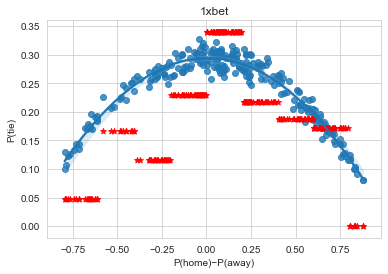

In [584]:
# 1xBet
# Dataframe for home win
xbet_homewin = xbet_modified[xbet_modified["variable"] == "odd_1"]
xbet_homewin = xbet_homewin[["match_id","probabilities"]]
xbet_homewin = xbet_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
xbet_awaywin = xbet_modified[xbet_modified["variable"] == "odd_2"]
xbet_awaywin = xbet_awaywin[["match_id","probabilities"]]
xbet_awaywin = xbet_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
xbet_draw = xbet_modified[xbet_modified["variable"] == "odd_x"]
xbet_draw = xbet_draw[["match_id","probabilities"]]
xbet_draw = xbet_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [xbet_homewin,xbet_awaywin,xbet_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('1xbet')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')


**18bet**

Text(0, 0.5, 'P(tie)')

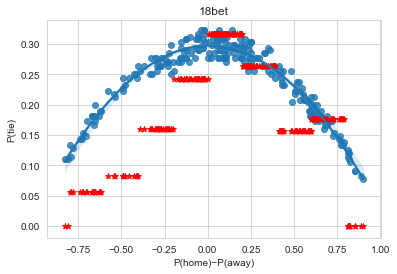

In [585]:
# 18bet
# Dataframe for home win
eightbet_homewin = eightbet_modified[eightbet_modified["variable"] == "odd_1"]
eightbet_homewin = eightbet_homewin[["match_id","probabilities"]]
eightbet_homewin = eightbet_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
eightbet_awaywin = eightbet_modified[eightbet_modified["variable"] == "odd_2"]
eightbet_awaywin = eightbet_awaywin[["match_id","probabilities"]]
eightbet_awaywin = eightbet_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
eightbet_draw = eightbet_modified[eightbet_modified["variable"] == "odd_x"]
eightbet_draw = eightbet_draw[["match_id","probabilities"]]
eightbet_draw = eightbet_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [eightbet_homewin,eightbet_awaywin,eightbet_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('18bet')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')


**bet365**

Text(0, 0.5, 'P(tie)')

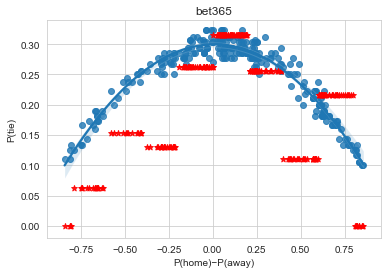

In [586]:
# bet365
# Dataframe for home win
bet365_homewin = bet365_modified[bet365_modified["variable"] == "odd_1"]
bet365_homewin = bet365_homewin[["match_id","probabilities"]]
bet365_homewin = bet365_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
bet365_awaywin = bet365_modified[bet365_modified["variable"] == "odd_2"]
bet365_awaywin = bet365_awaywin[["match_id","probabilities"]]
bet365_awaywin = bet365_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
bet365_draw = bet365_modified[bet365_modified["variable"] == "odd_x"]
bet365_draw = bet365_draw[["match_id","probabilities"]]
bet365_draw = bet365_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [bet365_homewin,bet365_awaywin,bet365_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('bet365')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')


**Chance.cz**

Text(0, 0.5, 'P(tie)')

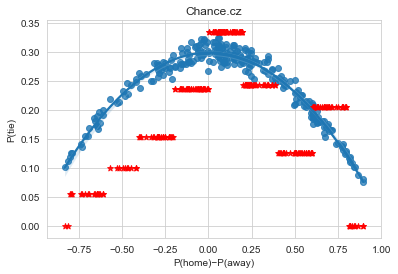

In [587]:
# Chance.cz
# Dataframe for home win
chance_homewin = chance_modified[chance_modified["variable"] == "odd_1"]
chance_homewin = chance_homewin[["match_id","probabilities"]]
chance_homewin = chance_homewin.rename(columns = {"probabilities" : "homewin_probs"})
# Dataframe for away win
chance_awaywin = chance_modified[chance_modified["variable"] == "odd_2"]
chance_awaywin = chance_awaywin[["match_id","probabilities"]]
chance_awaywin = chance_awaywin.rename(columns = {"probabilities" : "awaywin_probs"})
# Dataframe for draw
chance_draw = chance_modified[chance_modified["variable"] == "odd_x"]
chance_draw = chance_draw[["match_id","probabilities"]]
chance_draw = chance_draw.rename(columns = {"probabilities" : "draw_probs"})
# rename columns in matches dataframe
matches = matches.rename(columns = {"match_hometeam_score":"home_score","match_awayteam_score":"away_score"})
matches_df_2 = matches[["match_id","home_score","away_score"]]
# Merge all 4 dataframes on match id
dfs = [chance_homewin,chance_awaywin,chance_draw,matches_df_2]
from functools import reduce

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],
                                            how='outer'), dfs)
# drop rows with any na values because if na is from matches dataframe then that game has not been played yet
df_merged.dropna(how = "any",inplace = True)

# Add a new column phome-paway
df_merged["phome-paway"] = df_merged["homewin_probs"] - df_merged["awaywin_probs"]
# Add a new column that shows if a game ended as draw
df_merged["difference"] = df_merged["home_score"] - df_merged["away_score"]
df_merged["draw"] = df_merged["difference"].apply(lambda row: 1 if row == 0.0 else 0)


bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
labels = [1,2,3,4,5,6,7,8,9,10]
df_merged['binned'] = pd.cut(df_merged['phome-paway'], bins = bins, labels = labels)
s = pd.cut(df_merged['phome-paway'], bins=bins).value_counts()

#Turn binned column of type integer
df_merged["binned"] = df_merged["binned"].astype("int")

# Calculate probability of actual draws
draw_probabilites = df_merged.groupby("binned").apply(lambda row : np.sum(row["draw"])/len(row["draw"]))
dp = draw_probabilites.to_dict()
df_merged["binned_draw"] = df_merged["binned"].map(dp)

x = df_merged["phome-paway"]
y = df_merged["draw_probs"]
z = df_merged["binned_draw"]


# Use seaborn regplot to plot P(Home-Away) on x axis and P(tie) on y axis
sns.regplot(x = x,y = y,data = df_merged, order = 2, units = df_merged["binned"],scatter = True,truncate = True)
# Plot calculated draw values on top
plt.scatter(x,df_merged["binned_draw"],alpha=0.9, marker = "*",c = "red")


plt.title('Chance.cz')
plt.xlabel('P(home)−P(away)')
plt.ylabel('P(tie)')


**Discussion:**

We took out matches that the result changed after 90th minute. This decreased the noise in as can be observed from the plots. Also, calculated values and set draw values are closer. For example let's imagine in a game red card was received in less than 15 minutes than the odd_makers would set a new odd with a lower probability for the team that got the red card. This can explain why calculated results and set ones are closer. However the peak point for the curves(0.0-0.25 interval) is still the point calculated odds are above the set ones. As mentioned before there are other intervals in which calculated odds go above the set ones like  0.60-0.75 for Chance.cz that could be beneficial to bet on. OVerall odd makers set the odds in favor of making as much money that it is expected set odds will be lower than calculated odds. However some intervals as we have shown are against the odds.